In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from keras import Sequential
from keras.layers import Dense

In [74]:
# load and prepare data
df = pd.read_csv('athlete_events.csv', delimiter=',') 
df = df.loc[(df['Sport'] == "Basketball")]
df = df[['Sex', 'Age', 'Weight', 'Height', 'Year']]
labelEncoder = LabelEncoder()
labelEncoder2 = LabelEncoder()
labelEncoder.fit(df['Sex'])
df['Sex'] = labelEncoder.transform(df['Sex'])
df = df.dropna()
df.describe()

,Sex,Age,Weight,Height,Year
count,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000
mean,0.670938,25.453926,85.801799,191.226554,1988.836423
std,0.469937,3.906572,14.827004,11.493880,18.937195
min,0.000000,16.000000,50.000000,161.000000,1936.000000
25%,0.000000,22.000000,75.000000,183.000000,1972.000000
50%,1.000000,25.000000,85.000000,191.000000,1992.000000
75%,1.000000,28.000000,95.000000,200.000000,2004.000000
max,1.000000,40.000000,156.000000,226.000000,2016.000000


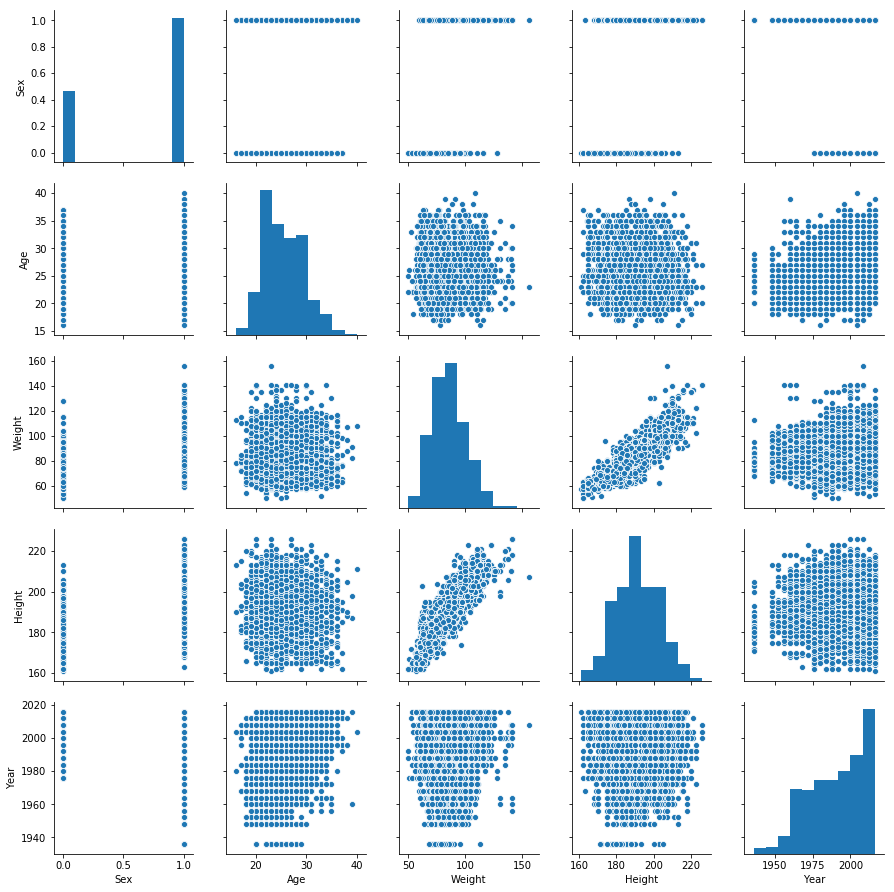

In [34]:
sns.pairplot(df)

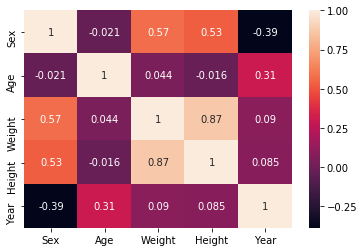

In [35]:
sns.heatmap(df.corr(), annot=True)

In [38]:
X = df.iloc[:,1:5]
y = df.iloc[:,0]

In [39]:
# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
# Fit to data, then transform it.
X = sc.fit_transform(X)
X

/Users/rokas/.virtualenvs/ssa/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rokas/.virtualenvs/ssa/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.37222505, -0.39135287, -0.97687504,  0.16707903],
       [-1.65229395, -0.93098252, -0.54180162,  1.01209232],
       [ 0.90784385, -0.05408434,  0.32834521,  0.58958567],
       ...,
       [ 0.65183007,  0.95772125,  0.85043331,  0.800839  ],
       [-0.62823883,  0.82281384,  0.93744799,  1.01209232],
       [ 1.93189897, -1.13334364, -1.76000719,  1.43459896]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
classifier = Sequential()
# 1st hidden layer
classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal', input_dim=4))
# 2nd  hidden layer
classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal'))
# Output layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [41]:
# Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

array([[-0.37222505, -0.86352881, -1.15090441, -0.88918758],
       [-1.65229395, -0.39135287, -0.54180162, -1.73420086],
       [-1.14026639,  0.62045272,  1.02446268, -0.04417429],
       ...,
       [-0.11621127, -0.05408434, -0.28075757,  1.43459896],
       [-0.37222505, -1.20079734, -0.97687504,  1.01209232],
       [-0.11621127, -1.20079734, -0.71583099,  1.01209232]])

In [42]:
classifier.fit(X_train, y_train, batch_size=10, epochs=100)


Epoch 1/100
2751/2751 [==============================] - 1s 315us/step - loss: 0.6447 - acc: 0.6761
Epoch 2/100
2751/2751 [==============================] - 0s 147us/step - loss: 0.4714 - acc: 0.6772
Epoch 3/100
2751/2751 [==============================] - 0s 144us/step - loss: 0.3907 - acc: 0.7728
Epoch 4/100
2751/2751 [==============================] - 0s 156us/step - loss: 0.3620 - acc: 0.8786
Epoch 5/100
2751/2751 [==============================] - 0s 144us/step - loss: 0.3459 - acc: 0.8819
Epoch 6/100
2751/2751 [==============================] - 0s 145us/step - loss: 0.3334 - acc: 0.8866
Epoch 7/100
2751/2751 [==============================] - 0s 172us/step - loss: 0.3237 - acc: 0.8884
Epoch 8/100
2751/2751 [==============================] - 1s 298us/step - loss: 0.3164 - acc: 0.8899
Epoch 9/100
2751/2751 [==============================] - 1s 189us/step - loss: 0.3100 - acc: 0.8884
Epoch 10/100
2751/2751 [==============================] - 1s 216us/step - loss: 0.3045 - acc: 0.8920

2751/2751 [==============================] - 0s 151us/step - loss: 0.2466 - acc: 0.9026
Epoch 83/100
2751/2751 [==============================] - 0s 142us/step - loss: 0.2464 - acc: 0.9033
Epoch 84/100
2751/2751 [==============================] - 0s 138us/step - loss: 0.2463 - acc: 0.9026
Epoch 85/100
2751/2751 [==============================] - 1s 186us/step - loss: 0.2462 - acc: 0.9026
Epoch 86/100
2751/2751 [==============================] - 1s 222us/step - loss: 0.2458 - acc: 0.9037
Epoch 87/100
2751/2751 [==============================] - 0s 140us/step - loss: 0.2455 - acc: 0.9037
Epoch 88/100
2751/2751 [==============================] - 0s 134us/step - loss: 0.2458 - acc: 0.9033
Epoch 89/100
2751/2751 [==============================] - 0s 131us/step - loss: 0.2455 - acc: 0.9004
Epoch 90/100
2751/2751 [==============================] - 0s 133us/step - loss: 0.2455 - acc: 0.9033
Epoch 91/100
2751/2751 [==============================] - 0s 133us/step - loss: 0.2455 - acc: 0.9029
Epo

In [43]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

2751/2751 [==============================] - 0s 81us/step


[0.24401653556661665, 0.9036713922426771]

In [58]:
y_pred = classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [59]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[270  49]
 [ 41 557]]


In [ ]:
# According to this confusion matrix accuracy of this model is ~ 90%
# Using K-Means clustering algorithm in the previous task we got the accuracy of 92%,
# which is slightly better. Looking at the heatmap above we see that there is no strong
# relationship between 'year' and predicted feature - 'sex'. Let's check the accuracy by 
# dropping this feature.

In [75]:
df = df.drop(['Year'], axis=1)
X1 = df.iloc[:,1:4]
y1 = df.iloc[:,0]

In [76]:
sc1 = StandardScaler()
X1 = sc.fit_transform(X1)

In [77]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)
classifier1 = Sequential()
# 1st hidden layer
classifier1.add(Dense(3, activation='relu', kernel_initializer='random_normal', input_dim=3))
# 2nd  hidden layer
classifier1.add(Dense(3, activation='relu', kernel_initializer='random_normal'))
# Output layer
classifier1.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [79]:
classifier1.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
classifier1.fit(X1_train, y1_train, batch_size=10, epochs=100)


Epoch 1/100
2751/2751 [==============================] - 1s 323us/step - loss: 0.6556 - acc: 0.6859
Epoch 2/100
2751/2751 [==============================] - 0s 135us/step - loss: 0.5068 - acc: 0.7932
Epoch 3/100
2751/2751 [==============================] - 0s 144us/step - loss: 0.4351 - acc: 0.7906
Epoch 4/100
2751/2751 [==============================] - 0s 144us/step - loss: 0.4241 - acc: 0.7950
Epoch 5/100
2751/2751 [==============================] - 0s 145us/step - loss: 0.4203 - acc: 0.7983
Epoch 6/100
2751/2751 [==============================] - 0s 170us/step - loss: 0.4181 - acc: 0.7986
Epoch 7/100
2751/2751 [==============================] - 0s 163us/step - loss: 0.4161 - acc: 0.8026
Epoch 8/100
2751/2751 [==============================] - 0s 159us/step - loss: 0.4145 - acc: 0.8048
Epoch 9/100
2751/2751 [==============================] - 0s 136us/step - loss: 0.4130 - acc: 0.8077
Epoch 10/100
2751/2751 [==============================] - 0s 146us/step - loss: 0.4117 - acc: 0.8073

Epoch 82/100
2751/2751 [==============================] - 0s 134us/step - loss: 0.4003 - acc: 0.8186
Epoch 83/100
2751/2751 [==============================] - 0s 134us/step - loss: 0.4004 - acc: 0.8175
Epoch 84/100
2751/2751 [==============================] - 0s 136us/step - loss: 0.4005 - acc: 0.8161
Epoch 85/100
2751/2751 [==============================] - 0s 136us/step - loss: 0.4004 - acc: 0.8182
Epoch 86/100
2751/2751 [==============================] - 1s 196us/step - loss: 0.4002 - acc: 0.8186
Epoch 87/100
2751/2751 [==============================] - 0s 156us/step - loss: 0.4000 - acc: 0.8193
Epoch 88/100
2751/2751 [==============================] - 0s 137us/step - loss: 0.4002 - acc: 0.8190
Epoch 89/100
2751/2751 [==============================] - 0s 135us/step - loss: 0.4002 - acc: 0.8193
Epoch 90/100
2751/2751 [==============================] - 0s 138us/step - loss: 0.4004 - acc: 0.8190
Epoch 91/100
2751/2751 [==============================] - 0s 136us/step - loss: 0.4002 - ac

In [80]:
eval_model=classifier1.evaluate(X1_train, y1_train)
eval_model

2751/2751 [==============================] - 0s 63us/step


[0.3993440643088335, 0.8178844058006645]

In [82]:
y_pred1 = classifier1.predict(X1_test)
y_pred1 = (y_pred1>0.5)

In [86]:
cm1 = confusion_matrix(y1_test, y_pred1)
print(cm1)

[[195 111]
 [ 64 547]]


In [ ]:
# By dropping feature 'year' we got accuracy reduced to 80%, although looking at the heatmap above
# this feature does not seem to have strong relationship with predicted feature - 'sex', it reduced 
# accuracy by 10%.